### 2-1. Nate 뉴스기사 제목 스크래핑하기 (필수)
https://news.nate.com/recent?mid=n0100

최신뉴스, 정치 , 경제, 사회, 세계, IT/과학 
6개의 섹션의 뉴스를 출력하는 함수를 생성하여 스크래핑 하기

Image, 기사제목, 기사링크

뉴스기사의 Image를 출력 하세요 
1) Image의 절대경로와 상대 경로를 합치려면 urljoin 함수를 사용하세요.
    from urllib.parse import urljoin

2) Image 출력은 Image 클래스와 display 함수를 사용하세요.
    from IPython.display import Image, display

3) img 엘리먼트의 존재 여부를 체크하신 후에 src 속성의 이미지를 경로를 추출하기
  => Image 가 없는 뉴스도 있기 때문에 

=============== 연예 뉴스 ===============
제목: HD현대인프라, 2분기 영업익 1058억원…전년比 29.8%↑
링크: https://news.nate.com/view/20250723n29709?mid=n0000


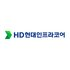

------------------------------------------------------------
제목: 삼성바이오로직스, 상반기 매출 첫 2조 돌파…CDMO '초격차' 확대
링크: https://news.nate.com/view/20250723n29708?mid=n0000


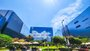

------------------------------------------------------------
제목: 경상국립대, 고문헌도서관 소장자료 10만 점 돌파
링크: https://news.nate.com/view/20250723n29707?mid=n0000


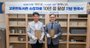

------------------------------------------------------------


In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from IPython.display import Image, display

# 섹션별 URL 딕셔너리
section_dict = {
    '최신뉴스': 'n0100','정치': 'n0101', '경제': 'n0102', '사회': 'n0103', 
    '세계': 'n0104', 'IT/과학': 'n0105'
}

def scrape_politics_news(section_name):
    section_one = section_dict.get(section_name)
    url = f'https://news.nate.com/recent?mid={section_one}' 
    res = requests.get(url)
    res.raise_for_status()
    soup = BeautifulSoup(res.text, 'html.parser')

    print(f"=============== {section_name} 뉴스 ===============")

    # 뉴스 각각의 <a> 태그가 들어있는 div들을 선택
    news_anchors = soup.select('div.mduSubjectList a.lt1')

    for a_tag in news_anchors[:3]:
        # 뉴스 링크
        link = a_tag.get('href')
        full_link = urljoin(url, link)

        # 제목은 a 태그 안의 h2.tit
        title_tag = a_tag.find('h2', class_='tit')
        title = title_tag.get_text(strip=True) if title_tag else "제목 없음"

        print(f"제목: {title}")
        print(f"링크: {full_link}")

        # 이미지가 있는 경우가 있으면 img 태그 찾아보기
        img_tag = a_tag.find('img')
        if img_tag and img_tag.has_attr('src'):
            img_src = img_tag['src']
            full_img_url = urljoin(url, img_src)
            display(Image(full_img_url))
        else:
            print("이미지 없음")

        print('-' * 60)

# 실행
scrape_politics_news('연예')


### 2-2. 하나의 네이버 웹툰과 1개의 회차에 대한 Image 다운로드 하기 (필수)
- 하나의 웹툰의 제목(title)과 회차번호(no),회차의URL(url) 을 입력으로 받는 함수를 선언합니다. 
   def download_one_episode(title,no,url):

- 아래와 같이 호출합니다.

  download_one_episode('일렉시드',341,'https://comic.naver.com/webtoon/detail?titleId=717481&no=341&week=wed')

- img\일렉시드\341 디렉토리가 생성되며 , 
그 디렉토리 아래에 웹툰 image들이 다운로드 되도록 해주세요.
